In [1]:
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import pandas as pd

from rdkit.Chem import rdMolDescriptors, Descriptors
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from tqdm.notebook import tqdm

from matplotlib import cm
plasma = cm.get_cmap('plasma', 32)

RDKit WARNING: [22:49:08] Enabling RDKit 2019.09.3 jupyter extensions


props_ac3drug_ac3small.csv

props_ac3drug_am3small_small.csv

In [2]:
prop_names = ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']

In [4]:
data1 = pd.read_csv("props_ac2drug_am2small.csv")

data1["source"] = ["enumerated"] * len(data1)

In [5]:
data1_props = data1[prop_names].copy()

In [9]:
Chem.MolToSmiles(Chem.MolFromSmiles('O=C(CN1C=C(C2CCCCC2)C3=C1C=C(C(NC4=CC(Cl)=CC(Cl)=C4)=O)C=C3)N5CCOCC5'))

'O=C(Nc1cc(Cl)cc(Cl)c1)c1ccc2c(C3CCCCC3)cn(CC(=O)N3CCOCC3)c2c1'

In [27]:
data1.largest_cleaned[0]

'O=C(Cn1c(-c2ccccc2)c(C2CCCCC2)c2cc(Nc3cc(Cl)cc(Cl)c3)c(C(=O)O)cc21)N1CCOCC1'

In [18]:
amide_row = np.array([6.106900000000006,
 514.4530000000005,
 1,
 4,
 63.57000000000001,
 5,
 0.4074074074074074,
 5,
 0.4472491082853226])

In [26]:
data1[data1.MW==0]

,rmat_tag,distance,largest_frag,largest_cleaned,LogP,MW,HBD,HBA,PSA,ROTB,FSP3,SSSR,QED,source


In [ ]:
# amide_row = np.array(data1[data1.rmat_tag==34093126][prop_names])

In [20]:
data1_deltas = data1_props-amide_row

In [21]:
data1[prop_names] = data1_deltas

In [22]:
data2 = pd.read_csv("props_ac2drug_am2small_small.csv")

In [23]:
data2["source"] = ["small"] * len(data2)

In [15]:
data2_props = data2[prop_names].copy()

amide_row = np.array(data2[data2.rmat_tag==34093126][prop_names])

data2_deltas = data2_props-amide_row

In [16]:
data2[prop_names] = data2_deltas

In [17]:
data1.head()

,rmat_tag,distance,largest_frag,largest_cleaned,LogP,MW,HBD,HBA,PSA,ROTB,FSP3,SSSR,QED,source
0,34095151,1.0,C[15C]([15N][14C@H]([13C])c1ccccc1)[16C@H](c1c...,CC(N[C@H](C)c1ccccc1)[C@H](c1ccc(N2Cc3ccccc3C2...,-0.4635,15.999,1.0,1.0,20.23,1.0,0.000000,0.0,-0.033839,enumerated
1,34889467,1.0,C[15C][16C@H](c1ccc(N2Cc3ccccc3C2=O)cc1)[17C](...,CC[C@H](c1ccc(N2Cc3ccccc3C2=O)cc1)C(=O)OC[C@@H...,-0.6342,15.999,0.0,2.0,23.22,1.0,0.000000,0.0,-0.044585,enumerated
2,44332191,1.0,C[15C]([13C][14C@@H]([15N])c1ccccc1)[16C@H](c1...,CC(C[C@@H](N)c1ccccc1)[C@H](c1ccc(N2Cc3ccccc3C...,-0.4766,15.999,1.0,1.0,34.22,1.0,0.000000,0.0,-0.034170,enumerated
3,34093102,1.0,C[15C][16C@H](c1ccc(N2Cc3ccccc3C2=O)cc1)[17C](...,CC[C@H](c1ccc(N2Cc3ccccc3C2=O)cc1)C(=O)ON[C@H]...,-0.0684,15.999,0.0,2.0,9.23,1.0,0.000000,0.0,-0.075573,enumerated
4,48840746,2.0,C[15C](=[13C][14C@@H]([15N])c1ccccc1)[16C@H](c...,CC(=C[C@@H](N)c1ccccc1)[C@H](c1ccc(N2Cc3ccccc3...,-0.5565,13.983,1.0,1.0,34.22,0.0,-0.076923,0.0,-0.042089,enumerated


In [78]:
lims_dict = {
"LogP": [-6, -4, -2 , 0 , 2],
"MW": [-400, -300, -200 ,-100  ,  0],
"HBD": [-1,  0,  1,  2  ],
"HBA": [-2, -1,  0,  1,  2],
"PSA": [ -40, -20,   0,  20 , 40 ],
"ROTB": [-6, -4, -2,  0 , 2 , 4],
# "FSP3": [ -0.75, -0.5,  -0.25,  0. ,   0.25,  0.5 ,  0.75 ],
"FSP3": [ -0.75,  -0.25,     0.25,   0.75 ],
"SSSR": [-5,   0,   5, 10 ],
"QED": [-0.4 ,-0.2,  0. ,  0.2 , 0.4 ],
}

In [79]:
labels_dict = {
"LogP": ["–6", "–4", "–2" , "0" , "2"],
"MW": ["–400", "–300", "–200" ,"–100"  ,  "0"],
"HBD": ["–1",  "0",  "1",  "2"  ],
"HBA": ["–2", "–1",  "0",  "1",  "2"],
"PSA": [ "–40", "–20",   "0",  "20" , "40" ],
"ROTB": ["–6", "–4", "–2",  "0" , "2" , "4"],
# "FSP3": [ -0.75, -0.5,  -0.25,  0. ,   0.25,  0.5 ,  0.75 ],
"FSP3": [ "–0.75",  "–0.25",     "0.25",   "0.75" ],
"SSSR": ["–5",   "0",   "5", "10" ],
"QED": ["–0.4" ,"–0.2",  "0.0" ,  "0.2" , "0.4" ],
}

In [69]:
axis_scaleup =              [0.1,   0.1,   0.2,  0.2,   0.1,   0.1,    0.1,    0.2,    0.1]

In [54]:
ip = 6
prop = "FSP3"

In [55]:
new_df = pd.DataFrame()

new_df = pd.concat((data1[prop], data2[prop],data1["distance"]>6),axis=1)
new_df.columns=(f"{prop}1",f"{prop}2","distance")
new_df["distance"] = ["foo"]*len(new_df)

#     df_short = new_df.iloc[::100]
df_short = new_df


lims = np.array([
np.min( [np.min(data1[prop]),np.min(data2[prop])] ), # min of both axes
np.max( [np.max(data1[prop]),np.max(data2[prop])] )  # max of both axes
])

lim_range = lims[1] - lims[0]

lims[0] -= lim_range*axis_scaleup[ip]
lims[1] += lim_range*axis_scaleup[ip]

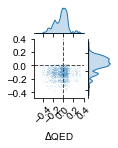

In [77]:
g = sns.jointplot(data=df_short,x=f"{prop}1",y=f"{prop}2",hue="distance",legend=False,
                  alpha=0.1,ratio=2,xlim=lims,ylim=lims,height=2)



gg = 0.3

g.ax_joint.cla()

sns.scatterplot(data=df_short.iloc[::300],x=f"{prop}1",y=f"{prop}2", s=1,alpha=0.1,
            ax=g.ax_joint)

g.set_axis_labels(r'$\Delta$'+f"{prop}", "", fontsize=6,font="Arial")
# g.set_axis_labels(r'$\Delta$'+f"{prop}", "", fontsize=6,font="Times New Roman")
g.ax_joint.set_xticks(lims_dict[prop])
g.ax_joint.set_yticks(lims_dict[prop])

g.ax_joint.set_xticklabels(labels_dict[prop],fontsize=5,rotation=45,font="Arial")
g.ax_joint.set_yticklabels(labels_dict[prop],fontsize=5,font="Arial")

g.ax_joint.axvline(0,color=(gg,gg,gg,1),ls="--",linewidth=1)
g.ax_joint.axhline(0,color=(gg,gg,gg,1),ls="--",linewidth=1)
# plt.tight_layout()

In [74]:
print("—")
print("–")
print("-")

—
–


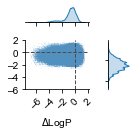

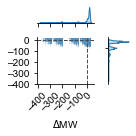

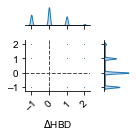

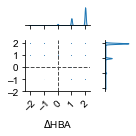

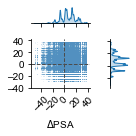

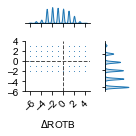

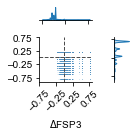

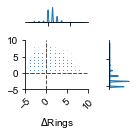

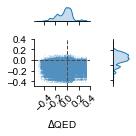

In [80]:
# fig,axs = plt.subplots(9)
# axs_f = axs.flatten()

axis_scaleup =              [0.1,   0.1,   0.2,  0.2,   0.1,   0.1,    0.1,    0.2,    0.1]
for ip, prop in enumerate(['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']):

# prop = "HBA"

    new_df = pd.DataFrame()

    new_df = pd.concat((data1[prop], data2[prop],data1["distance"]>6),axis=1)
    new_df.columns=(f"{prop}1",f"{prop}2","distance")
    new_df["distance"] = ["foo"]*len(new_df)

#     df_short = new_df.iloc[::100]
    df_short = new_df
    
    
    lims = np.array([
    np.min( [np.min(data1[prop]),np.min(data2[prop])] ), # min of both axes
    np.max( [np.max(data1[prop]),np.max(data2[prop])] )  # max of both axes
    ])
    
    lim_range = lims[1] - lims[0]
    
    lims[0] -= lim_range*axis_scaleup[ip]
    lims[1] += lim_range*axis_scaleup[ip]
    
#     plt.figure(figsize=(2,2))

    g = sns.jointplot(data=df_short,x=f"{prop}1",y=f"{prop}2",hue="distance",legend=False,
                      alpha=0.1,ratio=2,xlim=lims,ylim=lims,height=2)
    
    
    
    gg = 0.3
    
    g.ax_joint.cla()
    
    sns.scatterplot(data=df_short,x=f"{prop}1",y=f"{prop}2", s=1,alpha=0.1,
                ax=g.ax_joint)
    
    if prop == "SSSR":
        g.set_axis_labels(r'$\Delta$'+"Rings", "", fontsize=6,font="Arial")
    else:
        
        g.set_axis_labels(r'$\Delta$'+f"{prop}", "", fontsize=6,font="Arial")
    g.ax_joint.set_xticks(lims_dict[prop])
    g.ax_joint.set_yticks(lims_dict[prop])
    
    g.ax_joint.set_xticklabels(labels_dict[prop],size=6,rotation=45,font="Arial")
    g.ax_joint.set_yticklabels(labels_dict[prop],size=6,font="Arial")
    
    g.ax_joint.axvline(0,color=(gg,gg,gg,1),ls="--",linewidth=1)
    g.ax_joint.axhline(0,color=(gg,gg,gg,1),ls="--",linewidth=1)
    plt.tight_layout()
    
    
    
#     print(g.ax_marg_x.get_xticks())
    plt.savefig(f"fig3b_{prop}.png",dpi=900)
#     g.ax_joint.set_xticks((lims[0],0,lims[1]))
# plt.show()
#     ax1 = sns.jointplot(x=x, y=y)
#     g.ax_joint.cla()
#     plt.sca(g.ax_joint)

#     plt.hist2d(df_short[f"{prop}1"],df_short[f"{prop}2"], bins=(100, 100), cmap="plasma",cmin=1);
